In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

In [7]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
target = pd.DataFrame(iris.target)
target.rename(columns={0: 'target'}, inplace=True)

In [9]:
data = data.merge(target, how='inner', left_index=True, right_index=True)

In [10]:
data_vv = data[data['target'] >= 1]

In [11]:
data_vv.target = data_vv.target.replace({1: 'versicolor', 2: 'virginica'})

/var/folders/tt/zvp76tps5831_lf3ld0v33pc0000gp/T/ipykernel_71553/2052264641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vv.target = data_vv.target.replace({1: 'versicolor', 2: 'virginica'})


In [12]:
y = data_vv.target
del data_vv['target']

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
le.fit(y)

LabelEncoder()

In [15]:
y_ = pd.Series(data=le.transform(y))

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split 

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [17]:
data_ = data.copy()
data_ = data_[data_['target'] >= 1]
data_

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
EPOCHS = 200
LEARNING_RATE = 0.001
np.random.seed(9)
theta0, theta1 = np.random.normal(size=(2,))
theta0, theta1

(0.0011085547122109732, -0.2895440692501988)

In [20]:
func = lambda x: theta1*x + theta0
x = np.linspace(4, 8, 1000)

In [21]:
class LogReg:

    def __init__(self, theta0, theta1, EPOCHS, LEARNING_RATE, X, y):
        self.theta0 = theta0
        self.theta1 = theta1
        self.EPOCHS = EPOCHS
        self.LEARNING_RATE = LEARNING_RATE
        self.X = X
        self.y = y

In [22]:
class GradientDescent(LogReg):


    def _cost_function(self):
        """The _cost_function method calculates the cost function for a linear regression model. It measures the
            average squared difference between the predicted values and the actual values.
        """
        total_cost = 0
        for i in range(len(self.X)):
            predict = self.theta0 + self.theta1 * self.X[i]
            total_cost += (predict - self.y[i]) ** 2
        return total_cost / len(self.X)

    def _der_theta0(self):
        """The _der_theta0 method calculates the derivative of the cost function with respect to the intercept
            parameter (theta0) in a linear regression model.
        """
        total_cost = 0
        for i in range(len(self.X)):
            predict = self.theta0 + self.theta1 * self.X[i]
            total_cost += 2 * (predict - self.y[i])
        return total_cost / len(self.X)

    def _der_theta1(self):
        """The _der_theta1 method calculates the derivative of the cost function with respect to the slope parameter (theta1) in a linear regression model.
        """
        total_cost = 0
        for i in range(len(self.X)):
            predict = self.theta0 + self.theta1 * self.X[i]
            total_cost += 2 * (predict - self.y[i]) * self.X[i]
        return total_cost / (len(self.X))

    def fit(self):
        """The fit method in the LogReg class is used to train the linear regression model by updating the values of
            the intercept parameter (theta0) and the slope parameter (theta1) over a specified number of epochs.
        """
        for _ in range(self.EPOCHS):
            dt0 = self._der_theta0()
            dt1 = self._der_theta1()

            self.theta0 = self.theta0 - self.LEARNING_RATE * dt0
            self.theta1 -= self.LEARNING_RATE * dt1

    def get_coefs(self):
        """The get_cofs method in the LogReg class returns the values of the intercept parameter (theta0) and the slope
            parameter (theta1) of a linear regression model.
        """
        return self.theta0, self.theta1

    def get_theta0(self):
        """The get_theta0 method in the LogReg class returns the value of the intercept parameter (theta0) in a linear regression model.
        """
        return self.theta0

    def get_theta1(self):
        """The get_theta1 method in the LogReg class returns the value of the slope parameter (theta1) in a linear regression model.
        """
        return self.theta1

    def get_cost(self):
        """The get_cost method in the LogReg class returns the cost function value for a linear regression model. The cost function measures the average squared difference between the predicted values and the actual values.
        """
        return self._cost_function()



In [23]:
reg = GradientDescent(theta0, theta1, EPOCHS, LEARNING_RATE, np.array(data_), np.array(y_))

In [24]:
reg.fit()

In [25]:
reg.get_coefs()

(array([0.05036536, 0.13680352, 0.05759607, 0.18705608, 0.18787912]),
 array([0.07504625, 0.11971874, 0.1003593 , 0.09573696, 0.09633076]))

In [26]:
reg_2 = GradientDescent(theta0, theta1, EPOCHS, LEARNING_RATE, np.array(data_), np.array(y_))

In [27]:
reg_2.fit()

In [28]:
theta0, theta1 = reg_2.get_coefs()
theta0, theta1

(array([0.05036536, 0.13680352, 0.05759607, 0.18705608, 0.18787912]),
 array([0.07504625, 0.11971874, 0.1003593 , 0.09573696, 0.09633076]))

In [29]:
!pip install LogReg3==0.1.0

In [30]:
pip install LogReg3

Note: you may need to restart the kernel to use updated packages.


In [31]:
from Regression import LogReg

In [34]:
EPOCHS = 20
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)

list_params_gd = [params.copy()]
for _ in range(EPOCHS):
    predictions = params[0] + params[1] * np.array(data_)
    preds.append(predictions)

    cost = np.sum((predictions - np.array(y_)) ** 2) / len(predictions)
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - np.array(y_)) * (2/len(predictions))
    params[1] -= LEARNING_RATE * np.sum((predictions - np.array(y_)) * np.array(data_)) * (2/len(predictions))    

    list_params_gd.append(params.copy())

[ 0.00110855 -0.28954407]


ValueError: operands could not be broadcast together with shapes (100,5) (100,) 

In [35]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += (pred - y[i]) ** 2
    return total_cost / len(X)

def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i])
    return total_cost / len(X)

def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i]) * X[i]
    return total_cost / (len(X))  

In [48]:
np.random.seed(9)
theta0, theta1 = np.random.normal(size=(2,))
print(params)
X = np.array(data_)
Y = np.array(y_)


for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 -= LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print(f"t0: {theta0}")
    print("t1:", theta1)
    print("cost:", cost_function(X, Y, theta0, theta1))

[ 0.00110855 -0.28954407]
t0: [0.00157096 0.00137465 0.00149243 0.00130539 0.0012952 ]
t1: [-0.28659071 -0.2887633  -0.28755708 -0.28916883 -0.28919963]
cost: [5.63727789 2.05205477 4.13684125 1.33310604 1.28507309]
t0: [0.00202957 0.00164024 0.00187429 0.00150206 0.0014817 ]
t1: [-0.28366135 -0.287984   -0.28558031 -0.28879389 -0.28885542]
cost: [5.54972043 2.04528252 4.09641098 1.33131411 1.28354098]
t0: [0.00248442 0.00190533 0.00225412 0.00169856 0.00166806]
t1: [-0.2807558  -0.28720615 -0.28361369 -0.28841923 -0.28851144]
cost: [5.46358042 2.03853557 4.05639553 1.329525   1.28201096]
t0: [0.00293554 0.00216992 0.00263195 0.0018949  0.00185428]
t1: [-0.27787385 -0.28642975 -0.28165718 -0.28804486 -0.28816768]
cost: [5.3788349  2.03181382 4.01679065 1.32773871 1.28048302]
t0: [0.00338297 0.00243401 0.00300779 0.00209107 0.00204036]
t1: [-0.27501532 -0.2856548  -0.27971072 -0.28767078 -0.28782415]
cost: [5.2954613  2.02511718 3.97759213 1.32595523 1.27895718]
t0: [0.00382672 0.002697

In [50]:
theta0[-1]

0.004814769280795187

In [51]:
theta1[-1]

-0.2826984625327074

In [58]:
func = lambda x: theta1[-1]*x + theta0[-1]
x = np.linspace(4, 8, 1000)

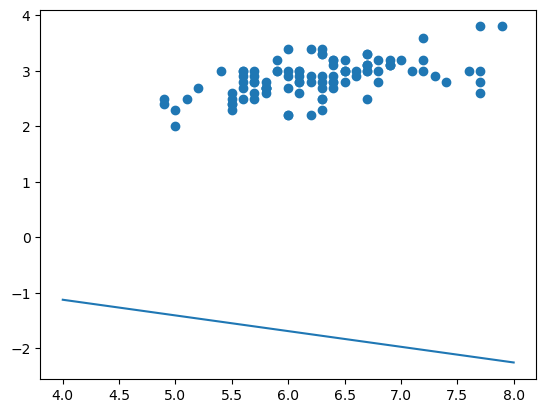

In [65]:
plt.plot(x, func(x))
plt.scatter(np.array(data_vv['sepal length (cm)']), np.array(data_vv['sepal width (cm)']))

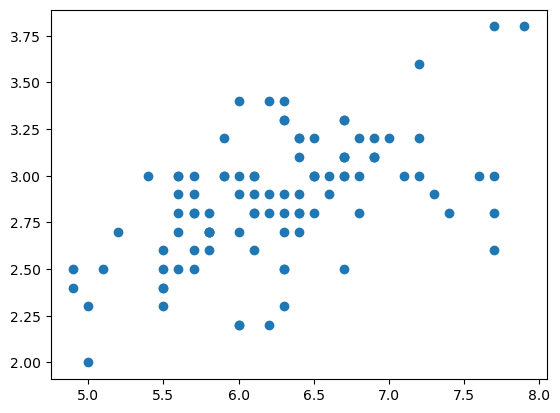

In [64]:
plt.scatter(np.array(data_vv['sepal length (cm)']), np.array(data_vv['sepal width (cm)']))

In [63]:
data_

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
